In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# User provides dataset
my_data = pd.read_csv('/content/glaucoma_dataset.csv')



In [2]:
my_data.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,None,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma


In [ ]:
my_data.describe()

,Patient ID,Age,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Pachymetry
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50002.16880,53.872200,17.507527,0.548437,549.733974
std,28939.82498,21.127563,4.356101,0.144326,28.902741
min,4.00000,18.000000,10.000000,0.300000,500.010000
25%,24660.25000,36.000000,13.760000,0.420000,524.590000
50%,50091.50000,54.000000,17.485000,0.550000,549.335000
75%,74829.25000,72.000000,21.300000,0.670000,574.972500
max,99992.00000,90.000000,25.000000,0.800000,599.990000


In [3]:
# Choose two feature columns
X = my_data[['Age']]
y = my_data['Patient ID']

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Classification
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
print('Accuracy',accuracy)

Accuracy 0.0


In [5]:
# Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("First 10 Predictions:", y_pred[:10])

First 10 Predictions: [50031.80636582 50076.80685583 50166.80783583 50121.80734583
 50049.11424659 50159.88468353 50139.1152266  50125.26892198
 50159.88468353 50211.80832584]


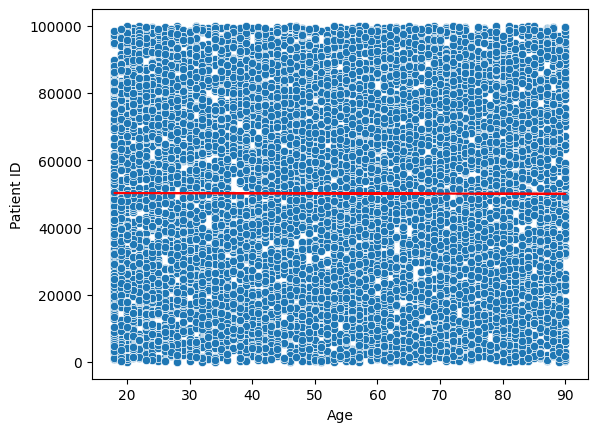

In [11]:
# Visualization
sns.scatterplot(x='Age', y='Patient ID', data=my_data)
plt.plot(my_data['Age'], reg.predict(X), color='red')
plt.xlabel('Age')
plt.ylabel('Patient ID')
plt.show()

Text(113.9222222222222, 0.5, 'True value')

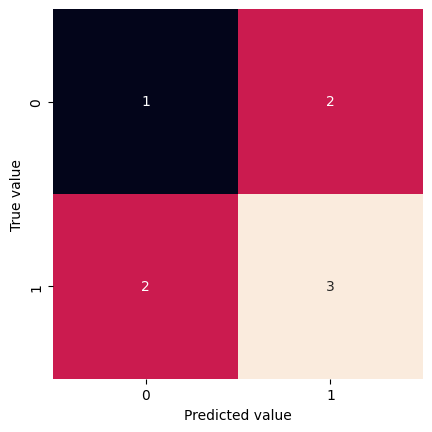

In [24]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_true, y_pred)

# Heatmap
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted value')
plt.ylabel('True value')

